<a href="https://colab.research.google.com/github/tcglarry/foryuan_zhi/blob/master/ForYuan_zhi_back_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
"""ali_build_model_fit_generator_cat11_xgb_confuse_testing.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1eTvR6DsVXG_usdQ-5GSz0hPBI_ysspxB
"""

# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse



E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 22280 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.7.0-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.0-0ubuntu1~ubuntu18.04.1) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.0-0ubuntu1~ubuntu18.04.1) ...


# connect google drive
## be reminded to have a folder: yzu with 3 files inside
1. diabetes.csv
2. X.npy
3. y.npy

In [2]:

from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
!ls 'drive/My Drive/yzu'


diabetes.csv  X.npy  Y.npy


# Example: PIMA Diabetes

## Import

In [0]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
# load data
src = 'drive/My Drive/yzu/'
dataset = pd.read_csv(src+'diabetes.csv')


In [11]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
dataset[:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [0]:
data_set = dataset.values

In [14]:
# split data into X and y
X = data_set[:,0:8]
Y = data_set[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
print (classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.82      0.84      0.83       162
        1.0       0.70      0.67      0.69        92

avg / total       0.78      0.78      0.78       254



# Change Thrshold

In [16]:
predictions_03 = model.predict_proba(X_test)[:,1] > 0.3
accuracy = accuracy_score(y_test, predictions_03)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.23%


In [17]:

print (classification_report(y_test,predictions_03))

             precision    recall  f1-score   support

        0.0       0.87      0.69      0.77       162
        1.0       0.60      0.82      0.69        92

avg / total       0.77      0.73      0.74       254



In [0]:
print (classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.87      0.69      0.77       162
        1.0       0.60      0.82      0.69        92

avg / total       0.77      0.73      0.74       254



In [18]:
from sklearn.svm import SVC
gbc =  SVC()
gbc.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
y_pred = gbc.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.78%


In [20]:
print (classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.64      1.00      0.78       162
        1.0       0.00      0.00      0.00        92

avg / total       0.41      0.64      0.50       254



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Deep Learning Example Hand Signal 

In [21]:

from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet121
from keras.preprocessing import image
#from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,  img_to_array, load_img

from keras.layers import Dense, GlobalAveragePooling2D

from keras.applications.xception import Xception, preprocess_input

import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf
import subprocess
import os
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, merge, Lambda,UpSampling2D, concatenate, Reshape, Dropout,Cropping2D,Activation
from keras.models import Model, load_model
import pandas as pd
import sklearn 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.callbacks import Callback
from keras.applications.mobilenet import MobileNet
from keras.applications.nasnet import NASNetMobile,NASNetLarge
import matplotlib.image as mpimg
from skimage import io
from xgboost.sklearn import XGBClassifier

Using TensorFlow backend.


In [22]:
X= np.load(src+'X.npy')
X.shape

(2062, 64, 64)

# take a look:  random sleect a picture (eg. picture number 200)

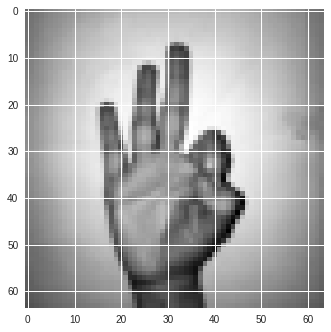

In [27]:
plt.imshow(X[200,:,:],cmap='gray')

In [28]:

y =  np.load(src+'Y.npy')
y.shape

(2062, 10)

In [29]:
y[-5:,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [30]:

X= X[:,:,:,np.newaxis]
X.shape

(2062, 64, 64, 1)

In [31]:
X = np.concatenate([X,X,X],axis=-1)
X.shape

(2062, 64, 64, 3)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print (X_train.shape)
print (X_test.shape)

(1443, 64, 64, 3)
(619, 64, 64, 3)


In [0]:

def conv_block(ch, activation= 'relu', padding='same',kernel_regularizer=regularizers.l2(0.01)):       
    return Conv2D(ch,(3,3),activation= activation, padding =padding )


def build_model(ch=32):
    #inputs = Input((IMAGE_HEIGHT,IMAGE_WIDTH,ch))
    inputs = Input((64,64,1))

    x = Conv2D(32,(2,2),padding='valid')(inputs)
 
    x =  conv_block(ch)(x)
    x = conv_block(ch)(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    
    x =  conv_block(ch*2)(x)
    x = conv_block(ch*2)(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    
    x =  conv_block(ch*4)(x)
    x = conv_block(ch*4)(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    
    x =  conv_block(ch*8)(x)
    x = conv_block(ch*8)(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    
    x= GlobalAveragePooling2D()(x)
    
    x = Dense (128, activation = 'relu' )(x)
    
    x = Dense (32, activation = 'relu' )(x)
    
    output = Dense(10,activation = 'softmax')(x)
    
    model = Model(inputs= inputs, outputs=output)
    
    model.summary()
    
    return model
    

In [0]:

def build_model_2():
    inputs = Input(shape=(64,64,3))
    #inputs = Lambda(lambda x: x/275. - 1.0)(inputs)
    # create the base pre-trained model
    base_model = DenseNet121(weights='imagenet',input_tensor=inputs,  include_top=True)
    
    x = base_model.layers[-2].output
    
    x = Dense(128,activation='relu')(x)
    x = Dropout(0.3)(x)
    
    x = Dense(32,activation='relu')(x)
    x = Dropout(0.3)(x)
    
    output = Dense(10,activation = 'softmax')(x)
    
 
    model = Model(inputs=base_model.input, outputs=output)
    model.summary()
    
    return model

In [0]:
# del model    del model only if you want to restart learning 

In [41]:
model = build_model_2()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 70, 70, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [0]:
model.compile (optimizer='Adam', loss = ['categorical_crossentropy'], metrics =['acc'])


# Model  training with early stops

In [44]:

checkpoint = ModelCheckpoint(filepath= src+'hand_signal_back_up.h5', monitor = 'val_loss', save_best_only=True, mode= 'auto')
earlystop = EarlyStopping(patience=10)
callback_list = [checkpoint, earlystop]
model.fit(x=X_train, y=y_train, batch_size=32, epochs=300, callbacks = callback_list, verbose=1, validation_split=0.2,  shuffle=True)


Train on 1154 samples, validate on 289 samples
Epoch 1/300
1154/1154 [==============================] - 40s 34ms/step - loss: 1.5665 - acc: 0.4532 - val_loss: 0.6664 - val_acc: 0.8062
Epoch 2/300
1154/1154 [==============================] - 12s 10ms/step - loss: 0.6458 - acc: 0.8085 - val_loss: 0.7292 - val_acc: 0.8304
Epoch 3/300
1154/1154 [==============================] - 12s 10ms/step - loss: 0.4027 - acc: 0.8821 - val_loss: 1.8577 - val_acc: 0.7474
Epoch 4/300
1154/1154 [==============================] - 12s 10ms/step - loss: 0.3982 - acc: 0.8839 - val_loss: 2.8296 - val_acc: 0.7301
Epoch 5/300
1154/1154 [==============================] - 12s 10ms/step - loss: 0.4869 - acc: 0.8769 - val_loss: 0.5439 - val_acc: 0.9031
Epoch 6/300
1154/1154 [==============================] - 12s 10ms/step - loss: 0.2580 - acc: 0.9350 - val_loss: 0.6291 - val_acc: 0.8893
Epoch 7/300
1154/1154 [==============================] - 11s 10ms/step - loss: 0.2761 - acc: 0.9263 - val_loss: 7.7175 - val_acc: 0

KeyboardInterrupt: ignored

# Model evaluation: [loss, accuracy]

In [45]:
model.evaluate(X_test,y_test)

619/619 [==============================] - 1s 2ms/step


[0.030355545136540065, 0.9919224555735057]

In [0]:
model.save(src+'final_mode.h5')

# Classficiation report and confusion matrix

In [47]:
predictions = model.predict(X_test)
predictions=np.argmax(predictions,axis=1)
predictions.shape


(619,)

In [48]:
np.argmax(y_test,axis=1).shape

(619,)

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy = accuracy_score(np.argmax(y_test,axis=1), predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print (classification_report(np.argmax(y_test,axis=1),predictions))

Accuracy: 99.19%
             precision    recall  f1-score   support

          0       1.00      0.97      0.98        60
          1       0.99      1.00      0.99        72
          2       0.99      0.99      0.99        68
          3       1.00      1.00      1.00        55
          4       1.00      0.98      0.99        57
          5       0.98      1.00      0.99        63
          6       0.97      1.00      0.99        69
          7       1.00      1.00      1.00        57
          8       1.00      0.98      0.99        64
          9       1.00      1.00      1.00        54

avg / total       0.99      0.99      0.99       619



In [0]:
class_names = [i for i in range (10)]

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          cmap=plt.cm.Blues):


    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    """
    
    print(cm)
    print ('\n\n')
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    '''
    labels = classes
    #cm = confusion_matrix(y_test, pred, labels)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    '''
 

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[58  0  0  0  0  0  2  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0]
 [ 0  0 67  0  0  1  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  1  0  0 56  0  0  0  0  0]
 [ 0  0  0  0  0 63  0  0  0  0]
 [ 0  0  0  0  0  0 69  0  0  0]
 [ 0  0  0  0  0  0  0 57  0  0]
 [ 0  0  1  0  0  0  0  0 63  0]
 [ 0  0  0  0  0  0  0  0  0 54]]



Normalized confusion matrix


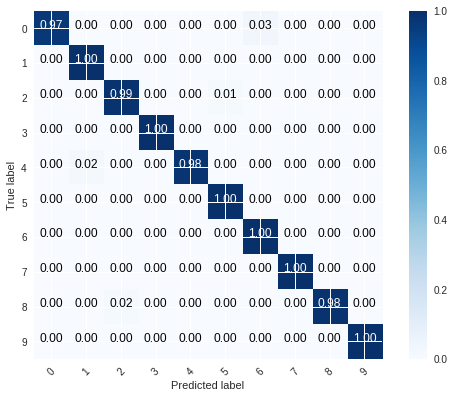

In [51]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(np.argmax(y_test,axis=1), predictions)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names)


In [52]:
print (classification_report(np.argmax(y_test,axis=1),predictions))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98        60
          1       0.99      1.00      0.99        72
          2       0.99      0.99      0.99        68
          3       1.00      1.00      1.00        55
          4       1.00      0.98      0.99        57
          5       0.98      1.00      0.99        63
          6       0.97      1.00      0.99        69
          7       1.00      1.00      1.00        57
          8       1.00      0.98      0.99        64
          9       1.00      1.00      1.00        54

avg / total       0.99      0.99      0.99       619

